In [2]:
import numpy  as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style






Import the data


In [3]:
df = pd.read_excel(r"Air_BNB.xlsx")

In [4]:
df.drop('id',axis=1,inplace= True)

In [5]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [6]:
# print("The number of rows", df.shape[0])
# print("The number of columns", df.shape[1])
df.shape

(74111, 10)

In [7]:
df.head(10)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
5,Private room,2.0,1.0,strict,1.0,t,100.0,1.0,1.0,4.442651
6,Entire home/apt,3.0,1.0,moderate,1.0,t,97.0,1.0,1.0,4.418841
7,Entire home/apt,2.0,1.0,moderate,1.0,f,93.0,1.0,1.0,4.787492
8,Private room,2.0,1.0,moderate,1.0,f,99.0,1.0,1.0,4.787492
9,Private room,2.0,1.0,moderate,1.0,t,90.0,1.0,1.0,3.583519


In [8]:
df.tail(10)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74101,Private room,1.0,1.0,moderate,1.0,f,90.0,1.0,1.0,4.584967
74102,Shared room,10.0,3.0,flexible,0.0,f,80.0,1.0,10.0,4.110874
74103,Entire home/apt,2.0,1.0,moderate,1.0,f,98.0,1.0,1.0,5.135798
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74105,Private room,2.0,1.0,moderate,1.0,f,91.0,1.0,1.0,4.248495
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,0.0,f,96.0,1.0,2.0,4.852030


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [10]:
# round(df.describe(include='all'),2).T
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [11]:
# df['room_type'].unique()
df['room_type'].nunique()

3

In [12]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':',df[column].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY : 3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE : 2

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [14]:
df2 = df.copy() 

In [15]:
df2.drop_duplicates(inplace=True)

In [16]:
df2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [17]:
df2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [18]:
df2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [19]:
df2 = pd.get_dummies(df2,columns=['room_type','cancellation_policy','instant_bookable'],drop_first = True, dtype= float)

In [20]:
df2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


Null Value Treatment

In [21]:
df_mean = df2

In [22]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [23]:
df_mean.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [24]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [25]:
df_median = df2.copy()

In [26]:
for column in df_median.columns:
    if df_median[column].dtype != 'object':
        median = df_mean[column].median()
        df_median[column] = df_median[column].fillna(median)

In [26]:
df_median

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [27]:
df_median.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df2)
df_knn = pd.DataFrame(data = df_imputed,columns=df2.columns)



In [29]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54112,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
54113,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
54114,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
54115,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


Outlier Treatment

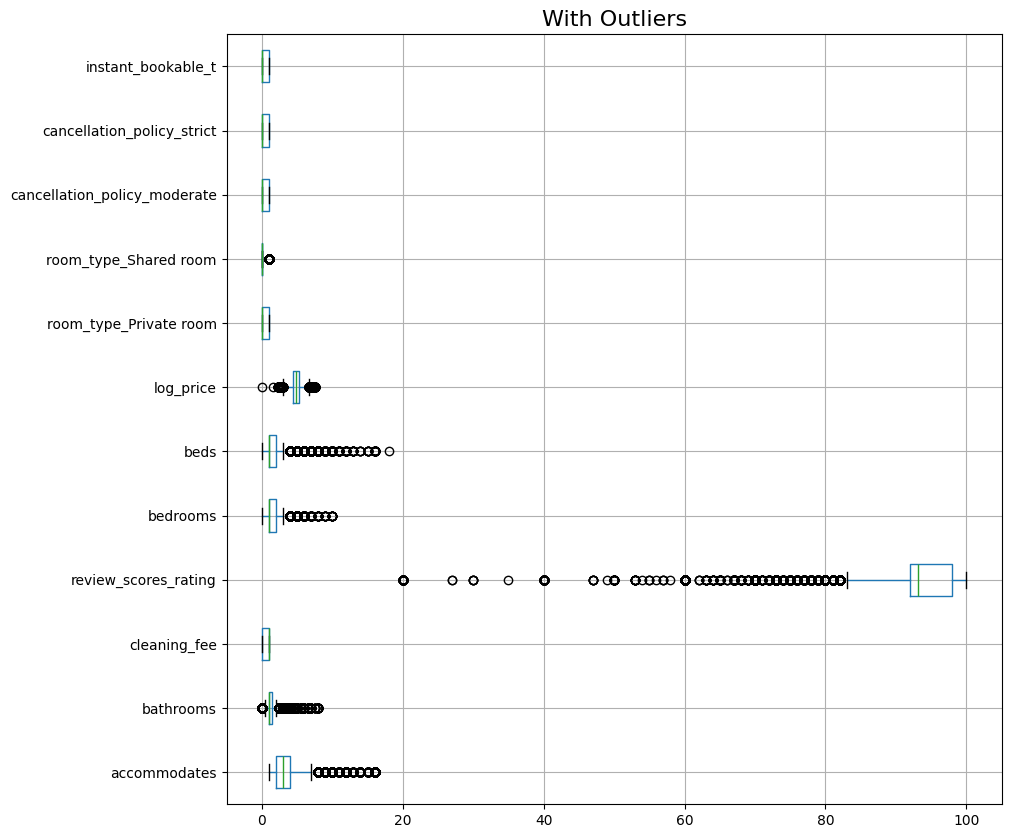

In [30]:
continuous = df_knn.dtypes[(df_knn.dtypes != 'unit8') & (df_knn.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_knn[continuous].boxplot(vert = 0)
plt.title('With Outliers', fontsize = 16)
plt.show()

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_Range = float(Q1 - (1.5 * IQR))
    upper_range = float(Q3 + (1.5 * IQR))
    return lower_Range, upper_range

In [32]:
remove_outlier(df_knn['review_scores_rating'])

(83.0, 107.0)

In [33]:
df_mean_outlier = df_mean.copy()
df_median_outlier = df_median.copy()
df_knn_outlier = df_knn.copy()

In [34]:
df_outliers = [df_mean_outlier,df_median_outlier,df_knn_outlier]

In [35]:
for df in df_outliers:
    for column in df.columns:
        lr,ur = remove_outlier(df[column])
        df[column] = np.where(df[column] > ur, ur, df[column])
        df[column] = np.where(df[column] < lr, lr, df[column])


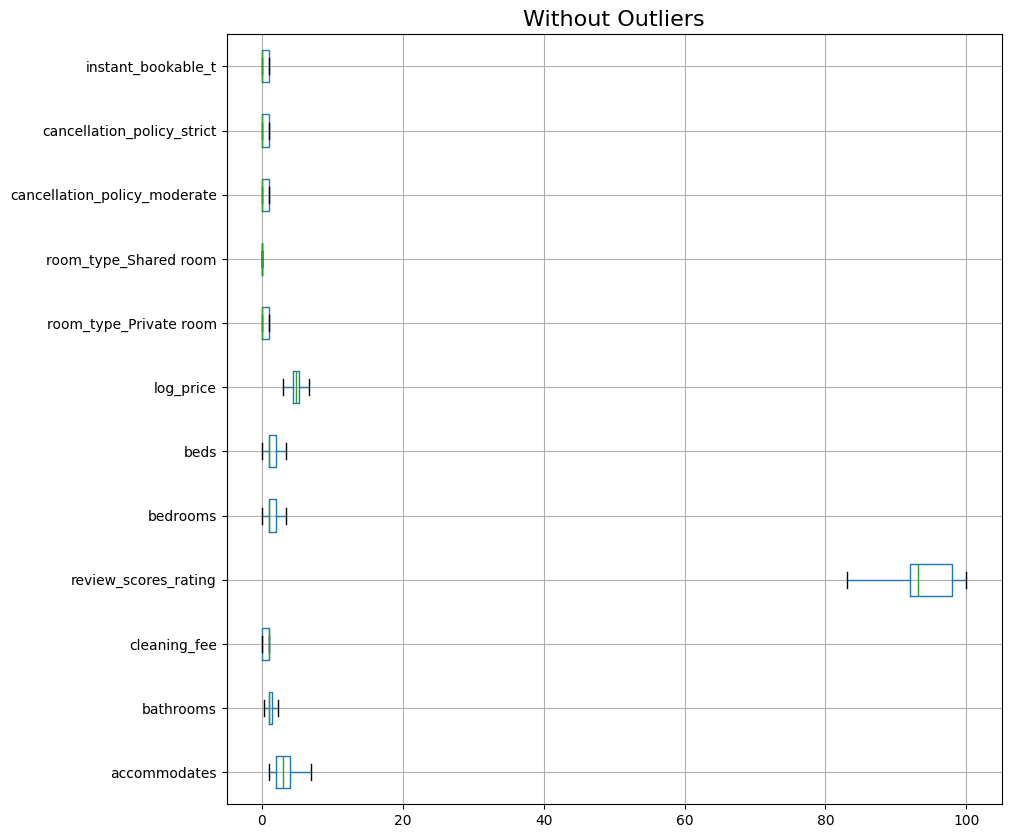

In [36]:
plt.figure(figsize=(10,10))
df_knn_outlier.boxplot(vert = 0)
plt.title('Without Outliers', fontsize = 16)
plt.show()

Data Distribution

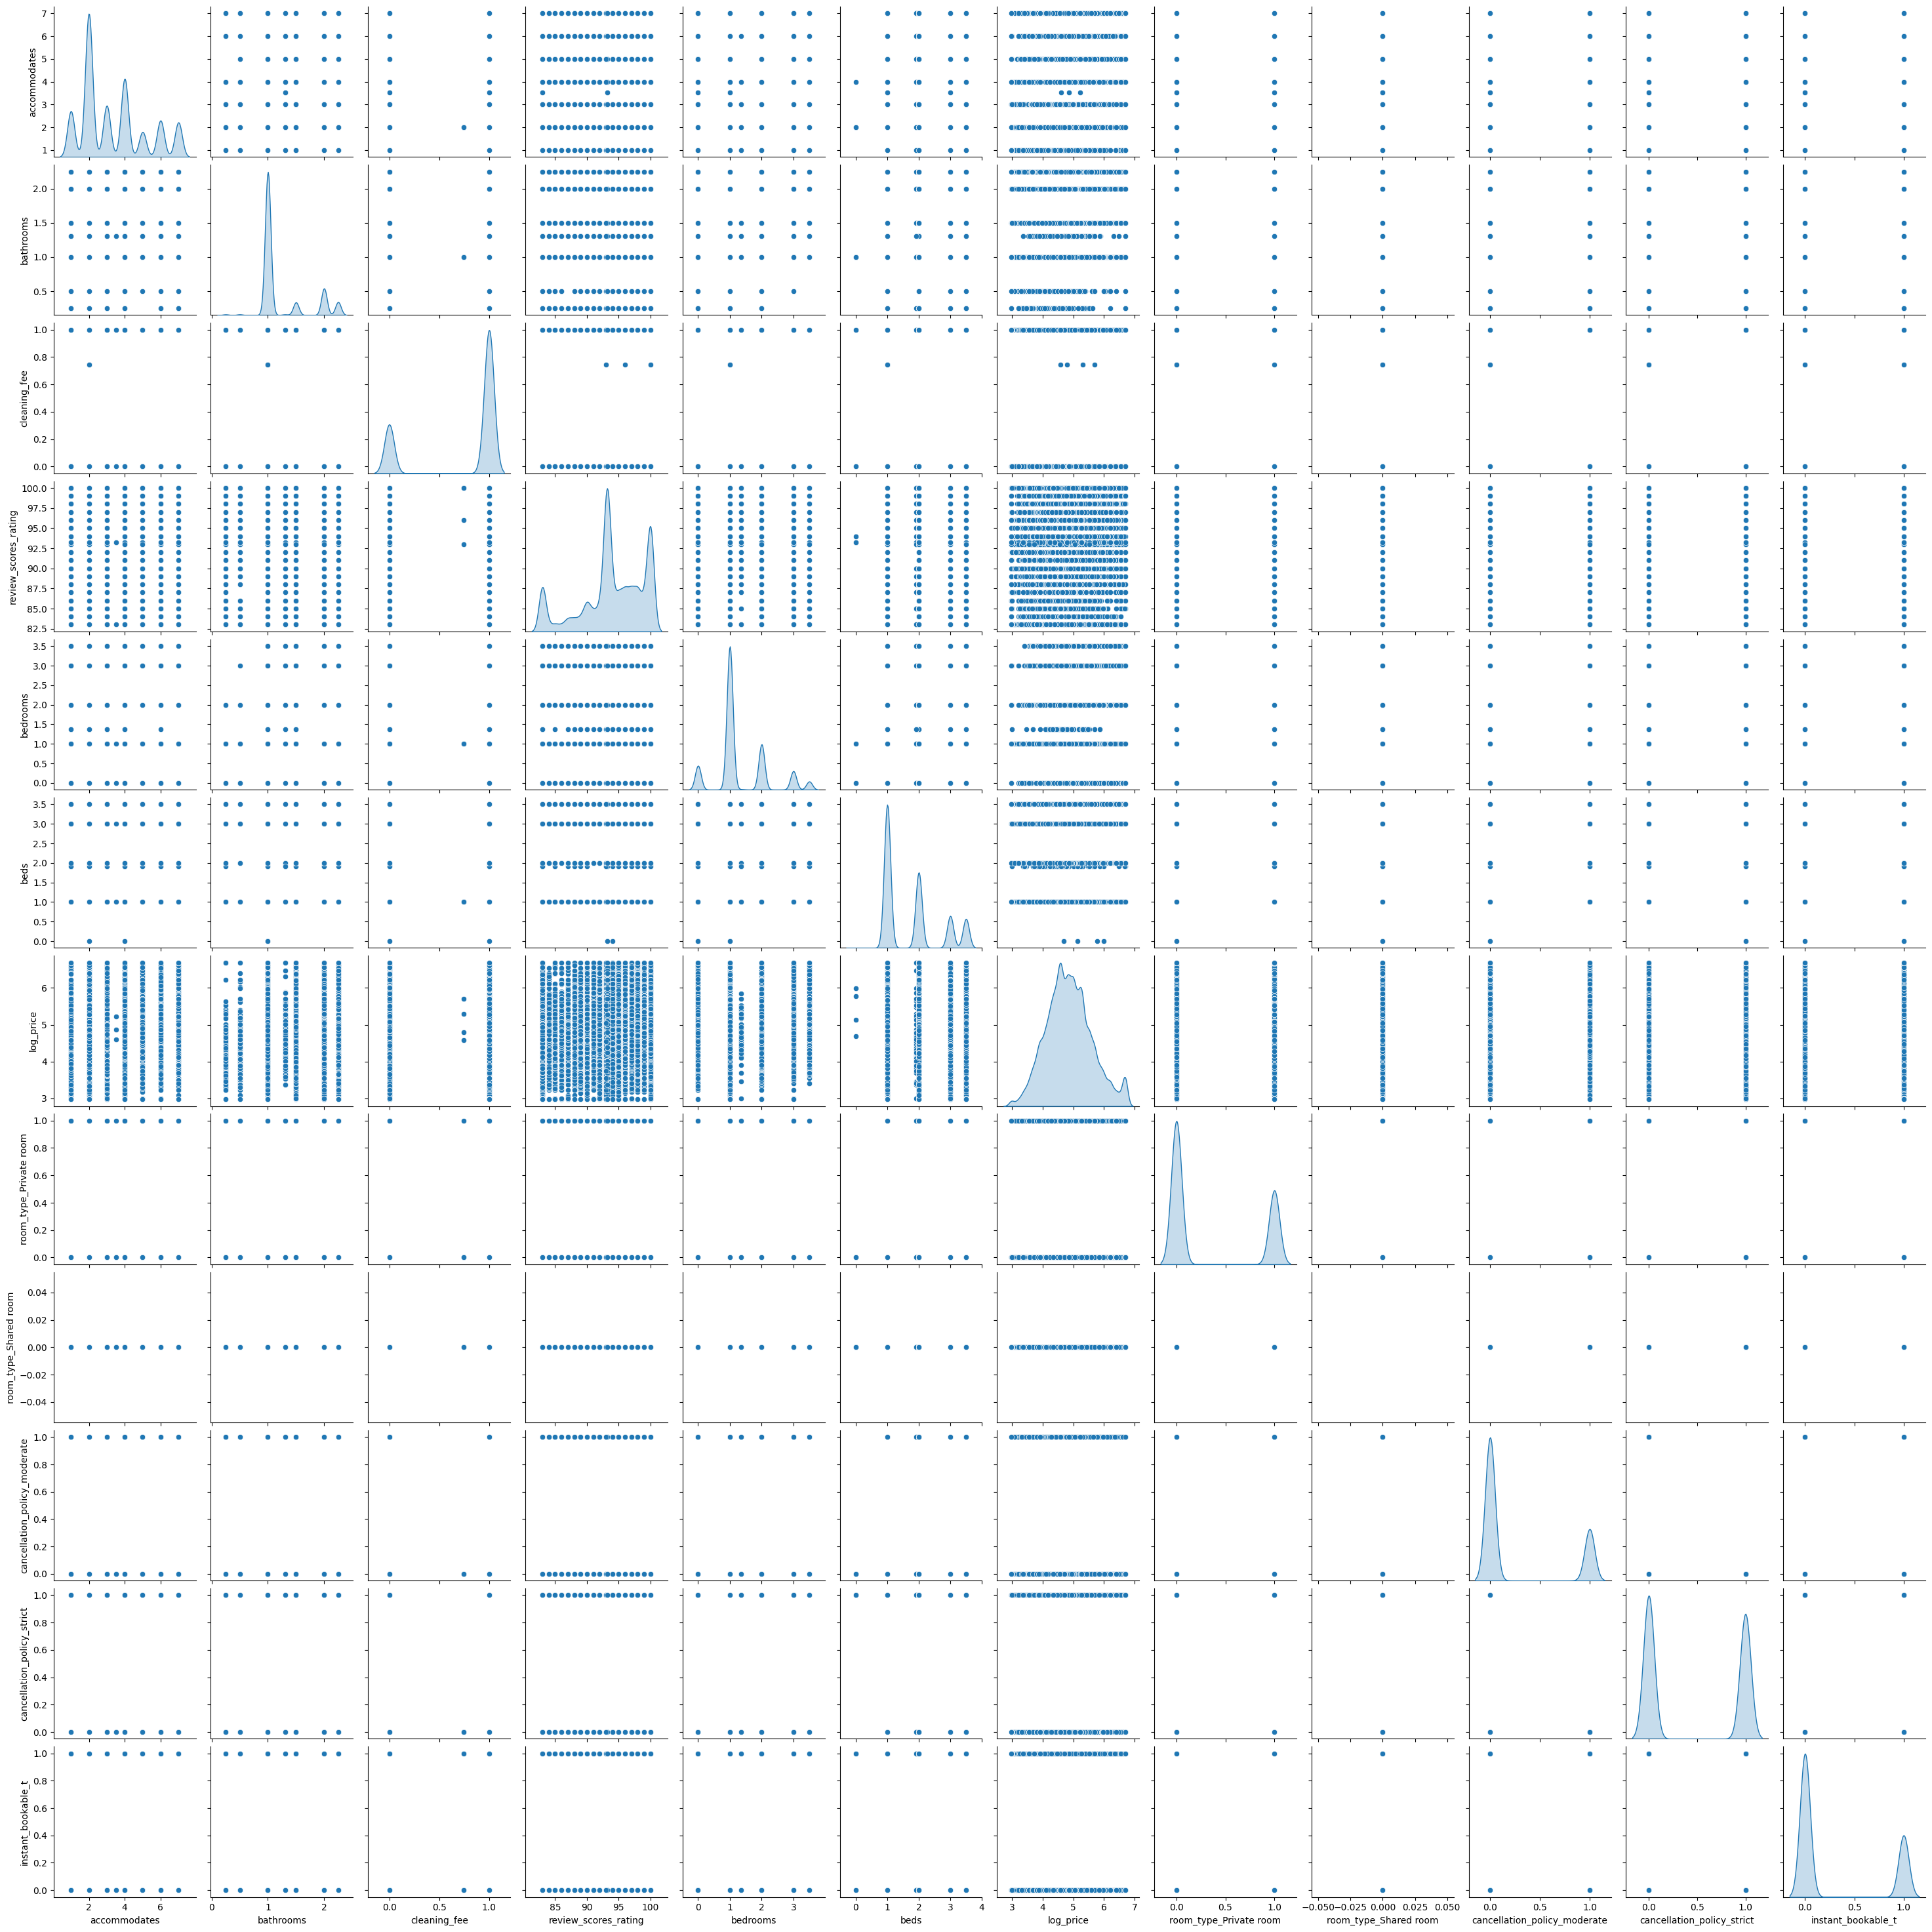

In [37]:
sns.pairplot(df_mean_outlier, diag_kind='kde')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

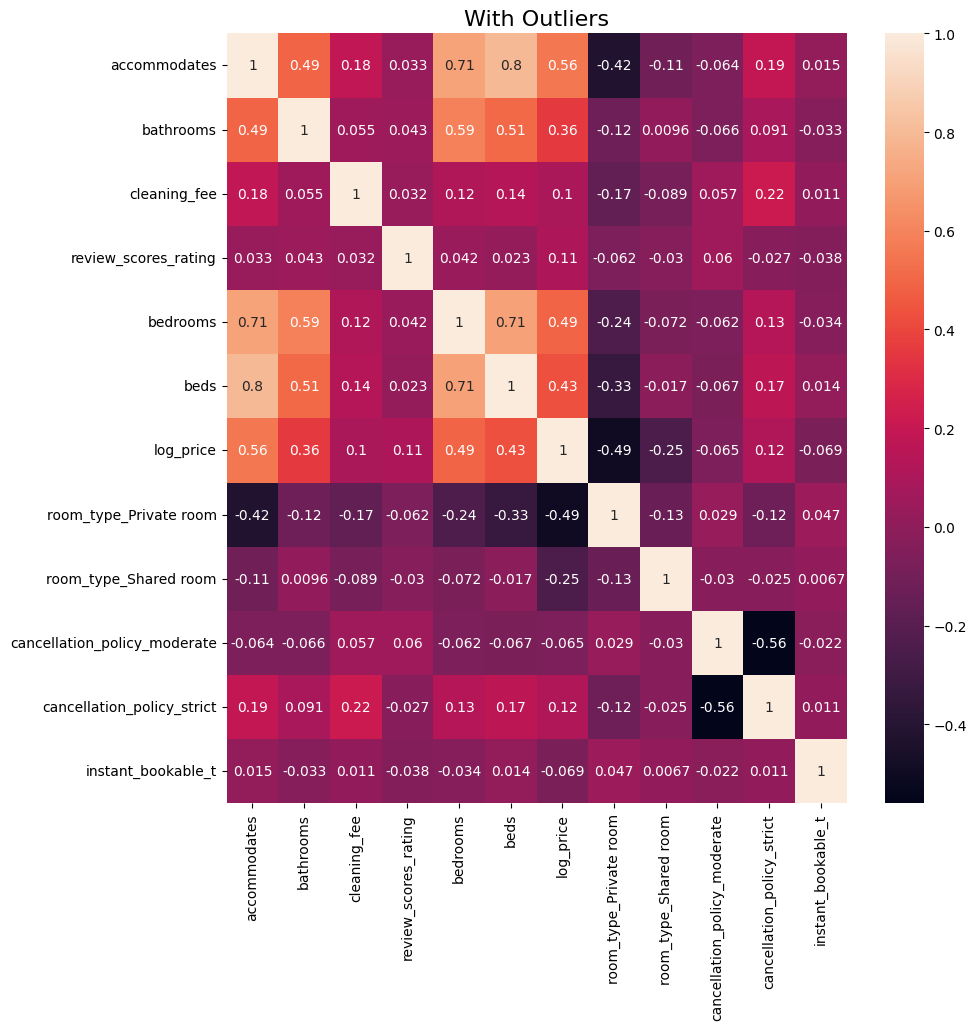

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean.corr(),annot=True)
plt.title('With Outliers', fontsize = 16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

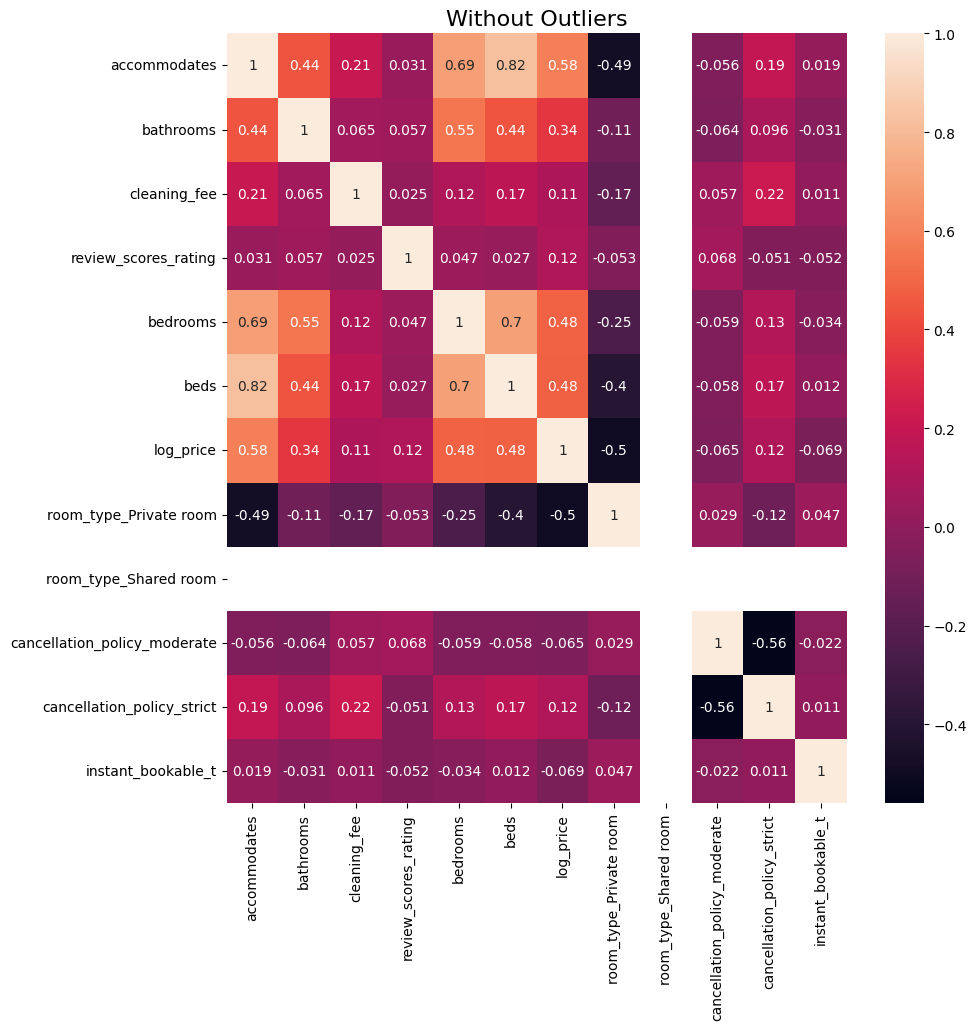

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean_outlier.corr(),annot=True)
plt.title('Without Outliers', fontsize = 16)
plt.show

Train Test Split

mean without outlier

In [52]:
x = df_mean_outlier.drop('log_price',axis = 1)
y = df_mean_outlier[['log_price']]

In [54]:
x.head(5)

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,83.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [53]:
y.head(5)

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.3, random_state= 1)

Linear Regression Model

In [56]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [57]:
regression_model.score(X_train,y_train)

0.4482110682912629

mean with outliers

In [58]:
x = df_mean.drop('log_price',axis = 1)
y = df_mean[['log_price']]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.3, random_state= 1)

In [60]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [61]:
regression_model.score(X_train,y_train)

0.5059245563862973

Meadian without outliers

In [62]:
x = df_median_outlier.drop('log_price',axis = 1)
y = df_median_outlier[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.3, random_state= 1)
regression_model.fit(X_train,y_train)
regression_model.score(X_train,y_train)

0.4482110682912629

Median with outliers

In [63]:
x = df_median.drop('log_price',axis = 1)
y = df_median[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.3, random_state= 1)
regression_model.fit(X_train,y_train)
regression_model.score(X_train,y_train)

0.5059245563862973

KNN with outliers

In [64]:
x = df_knn.drop('log_price',axis = 1)
y = df_knn[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.3, random_state= 1)
regression_model.fit(X_train,y_train)
regression_model.score(X_train,y_train)

0.5059245563862973

KNN without outliers

In [65]:
x = df_knn_outlier.drop('log_price',axis = 1)
y = df_knn_outlier[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.3, random_state= 1)
regression_model.fit(X_train,y_train)
regression_model.score(X_train,y_train)

0.4482110682912629

In [66]:
df2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [67]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
22125,1.0,1.0,1.0,100.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.077537
21345,2.0,1.0,1.0,99.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.595120
29299,1.0,1.0,0.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.891820
48356,4.0,1.0,1.0,95.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,4.595120
11063,2.0,1.0,0.0,93.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.317488


In [68]:
data_test.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
33694,4.0,2.0,1.0,100.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,5.402677
8930,3.0,1.0,1.0,88.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.867534
26368,1.0,1.0,1.0,100.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.174387
32595,3.0,1.0,1.0,83.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,4.779123
14713,3.0,1.0,0.0,100.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.787492


In [80]:
data_train.columns = data_train.columns.str.replace(' ', '_')


In [81]:
expr = 'log_price ~ accommodates + bathrooms + cleaning_fee + review_scores_rating + bedrooms + beds + room_type_Private_room + room_type_Shared_room + cancellation_policy_moderate + cancellation_policy_strict + instant_bookable_t'

In [82]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.338540e+00
accommodates                    1.385062e-01
bathrooms                       1.717504e-01
cleaning_fee                   -4.961311e-02
review_scores_rating            1.106390e-02
bedrooms                        1.464847e-01
beds                           -7.174946e-02
room_type_Private_room         -5.089391e-01
room_type_Shared_room          -8.906918e-17
cancellation_policy_moderate   -6.562837e-02
cancellation_policy_strict     -1.211044e-02
instant_bookable_t             -8.030404e-02
dtype: float64